In [2]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("trip_duration_data.csv", index_col=0)

/Users/thilakcm/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
df.head()

In [ ]:
df.info()

In [4]:
df_sampled = df.sample(n=100000, weights=df['Duration'])
# df_sampled

In [5]:
df_sampled.drop_duplicates(inplace=True)
df_sampled.duplicated().value_counts()

False    99949
dtype: int64

In [6]:
df_sampled['Duration'].value_counts()

10     1441
11     1393
12     1386
14     1382
15     1381
       ... 
3       435
118     434
119     357
2       167
1        10
Name: Duration, Length: 119, dtype: int64

<AxesSubplot:xlabel='Snow'>

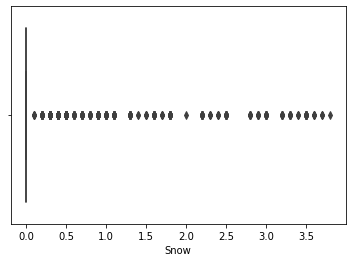

In [17]:
sns.boxplot(x=df_sampled['Snow'])

<AxesSubplot:xlabel='Precip'>

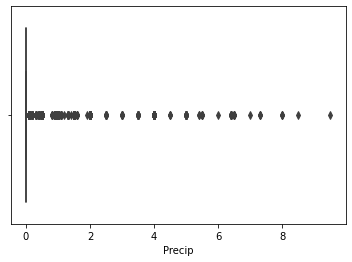

In [29]:
sns.boxplot(x=df_sampled['Precip'])

<AxesSubplot:xlabel='GroundTemp'>

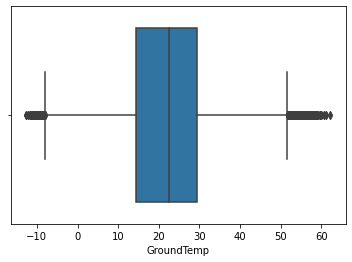

In [51]:
sns.boxplot(x=df_sampled['GroundTemp'])

In [49]:
df_sampled['GroundTemp'].quantile(0.0)

-12.7

In [56]:
df_sampled.drop(df_sampled[df_sampled['Snow'] > 4].index, inplace=True)

df_sampled.drop(df_sampled[df_sampled['Precip'] > 10].index, inplace=True)

df_sampled.drop(df_sampled[df_sampled['GroundTemp'] < -12.7].index, inplace=True)

In [57]:
X  = df_sampled.drop(['Duration'], axis=1)
y = df_sampled['Duration']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df_sampled['Duration'])

In [59]:
from xgboost import XGBRegressor, plot_importance

In [60]:
xgb_model = XGBRegressor()

In [61]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
predictions_xgb = xgb_model.predict(X_test)

In [71]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [68]:
print("XGBoost test R2 score: {:.2f}".format(r2_score(y_test, predictions_xgb)))

XGBoost test R2 score: 0.93


In [74]:
mean_squared_error(predictions_xgb, y_test)

69.85994605645097

In [73]:
MAE = mean_absolute_error(y_test, predictions_xgb)
print(f"mean_absolute_error of model:{MAE}")

mean_absolute_error of model:5.494669591513033


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

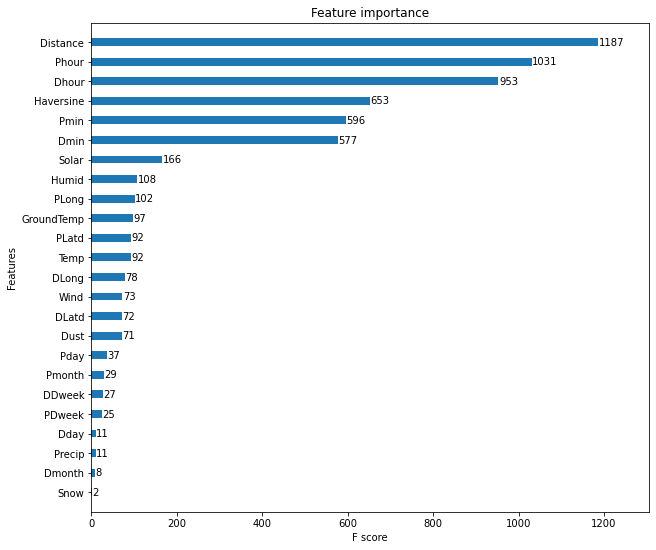

In [69]:
fig, ax = plt.subplots(figsize=(10, 9))
plot_importance(xgb_model, grid=False, height=0.4, ax=ax)